<a href="https://colab.research.google.com/github/Jaiwanthi-SH/Sales-Budget-Analytics/blob/main/BudgetSalesAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import itertools

#Reading dataset

In [ ]:
#Extracting Excel adventure dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
datesData = pd.read_excel(r'/content/gdrive/My Drive/Calender.xlsx')
display(datesData.head(5))

,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,2016-04-03,20160403,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,1,Sun,Weekend
1,2016-04-04,20160404,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,2,Mon,Weekday
2,2016-04-05,20160405,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,3,Tue,Weekday
3,2016-04-06,20160406,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,4,Wed,Weekday
4,2016-04-07,20160407,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,5,Thu,Weekday


In [ ]:
customerData = pd.read_excel(r'/content/gdrive/My Drive/Customers.xlsx')
display(customerData.head(5))

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [ ]:
ProductData = pd.read_excel(r'/content/gdrive/My Drive/Product.xlsx')
display(ProductData.head(5))

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [ ]:
territoryData = pd.read_excel(r'/content/gdrive/My Drive/Territory.xlsx')
display(territoryData.head(5))

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [ ]:
salesData = pd.read_excel(r'/content/gdrive/My Drive/Sales.xlsx')
display(salesData.head(5))

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost,List Price,Unnamed: 22,diif std cost,diff list price
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,3578.2700,0.0,NaN,-764.3184,NaN,#REF!,#REF!,NaN,#REF!,#REF!
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,3399.9900,0.0,NaN,-424.3188,NaN,#REF!,#REF!,NaN,#REF!,#REF!
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,3399.9900,0.0,NaN,-424.3188,NaN,#REF!,#REF!,NaN,#REF!,#REF!
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,699.0982,0.0,NaN,-127.1944,NaN,#REF!,#REF!,NaN,#REF!,#REF!
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,3399.9900,0.0,NaN,-424.3188,NaN,#REF!,#REF!,NaN,#REF!,#REF!


In [ ]:
BudgetData = pd.read_excel(r'/content/gdrive/My Drive/Budget.xlsx')
display(BudgetData.head(5))

,Category,Subcategory,ProductName,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016",Grand Total
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,486.0,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477.0,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,484.0,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,485.0,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670


Viewing Columns in each table

In [ ]:
datesData.columns

Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend'],
      dtype='object')

In [ ]:
customerData.columns

Index(['CustomerKey', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance'],
      dtype='object')

In [ ]:
ProductData.columns

Index(['ProductKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')

In [ ]:
territoryData.columns

Index(['SalesTerritoryKey', 'Region', 'Country', 'Group', 'RegionImage'], dtype='object')

In [ ]:
salesData.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost',
       'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price'],
      dtype='object')

#Merging Datasets

In [ ]:
#Merging Sales data with customer data

MergedData = pd.merge(salesData, customerData, on = 'CustomerKey')

In [ ]:
#Merging Sales, Customer data with Product data

MergedData = pd.merge(MergedData, ProductData, on = 'ProductKey')

In [ ]:
#Merging Sales, Customer, Product data with territory data

MergedData = pd.merge(MergedData, territoryData, on = 'SalesTerritoryKey')

In [ ]:
display(MergedData.head(5))

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [ ]:
#dimension of data before deleting a least significant column

MergedData.shape

(58189, 57)

In [ ]:
#dropping the color field

MergedData=MergedData.drop('Color',axis =1)

In [ ]:
#dimension after dropping

MergedData.shape

(58189, 56)

In [ ]:
MergedData.describe()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,...,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,StandardCost_y,ListPrice,DaysToManufacture,StartDate
count,58189.000000,58189,58189,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,...,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189,58189.000000,58189.000000,58189.000000,58189
mean,437.208304,2016-06-03 03:56:09.605939200,2016-06-10 04:03:24.657237760,18853.004640,1.043427,6.261716,1.887453,1.569386,413.888218,296.539185,...,59769.887779,1.838921,1.073502,0.690560,1.502466,2015-12-23 02:50:33.356819968,296.539185,503.666270,1.045215,2007-05-14 02:44:51.848974848
min,214.000000,2014-01-01 00:00:00,2014-01-08 00:00:00,11000.000000,1.000000,1.000000,1.000000,1.000000,0.572500,0.856500,...,10000.000000,0.000000,0.000000,0.000000,0.000000,2014-01-01 00:00:00,0.856500,2.290000,0.000000,2005-07-01 00:00:00
25%,358.000000,2016-04-01 00:00:00,2016-04-08 00:00:00,14012.000000,1.000000,4.000000,1.000000,1.000000,4.990000,3.362300,...,30000.000000,0.000000,0.000000,0.000000,1.000000,2015-06-21 00:00:00,3.362300,8.990000,0.000000,2007-07-01 00:00:00
50%,479.000000,2016-07-07 00:00:00,2016-07-14 00:00:00,18151.000000,1.000000,7.000000,2.000000,1.000000,24.490000,12.192400,...,60000.000000,2.000000,0.000000,1.000000,2.000000,2016-03-12 00:00:00,12.192400,32.600000,0.000000,2007-07-01 00:00:00
75%,529.000000,2016-10-10 00:00:00,2016-10-17 00:00:00,23450.000000,1.000000,9.000000,2.000000,2.000000,269.995000,343.649600,...,80000.000000,3.000000,2.000000,1.000000,2.000000,2016-07-26 00:00:00,343.649600,539.990000,4.000000,2007-07-01 00:00:00
max,606.000000,2016-12-30 00:00:00,2017-01-07 00:00:00,29483.000000,14.000000,10.000000,8.000000,4.000000,3578.270000,2171.294200,...,170000.000000,5.000000,5.000000,1.000000,4.000000,2016-12-30 00:00:00,2171.294200,3578.270000,4.000000,2007-07-01 00:00:00
std,118.099746,NaN,NaN,5433.374315,0.348948,2.960248,1.018829,1.047532,833.052938,560.171436,...,33128.041818,1.614467,1.580055,0.462267,1.155496,NaN,560.171436,941.462817,1.757395,NaN


In [ ]:
MergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [ ]:
MergedData.Gender.value_counts()

Gender
M    29314
F    28875
Name: count, dtype: int64

In [ ]:
Clean_Data = MergedData.copy()

#Droppig the unusueful fields in dataset

In [ ]:
Clean_Data.drop(columns = ['ProductKey','PromotionKey','SalesTerritoryKey','SalesOrderNumber','SalesOrderLineNumber','TaxAmt','FirstName','LastName','FullName','AddressLine1','DaysToManufacture','ProductLine','Photo','ProductDescription','Region','Group'],axis=1,inplace=True)

In [ ]:
Clean_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderDate             58189 non-null  datetime64[ns]
 1   ShipDate              58189 non-null  datetime64[ns]
 2   CustomerKey           58189 non-null  int64         
 3   OrderQuantity         58189 non-null  int64         
 4   UnitPrice             58189 non-null  float64       
 5   TotalProductCost      58189 non-null  float64       
 6   SalesAmount           58189 non-null  float64       
 7   Unnamed: 13           0 non-null      float64       
 8   Unnamed: 14           0 non-null      float64       
 9   Unnamed: 15           58189 non-null  float64       
 10  Unnamed: 16           58189 non-null  float64       
 11  Unnamed: 17           0 non-null      float64       
 12  Unnamed: 18           58189 non-null  float64       
 13  Unnamed: 19     

#Gender Diatribution Visualization

In [ ]:
g=Clean_Data.groupby('Gender')['CustomerKey'].count()
g

Gender
F    28875
M    29314
Name: CustomerKey, dtype: int64

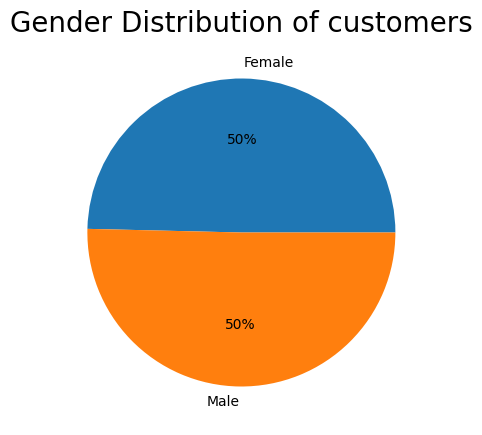

In [ ]:
#Gender distribution of customers by plotting Pie chart

plt.figure(figsize=(5,5))
plt.pie(g,labels = ['Female','Male'], autopct='%0.0f%%')
plt.title("Gender Distribution of customers",fontsize = 20)
plt.show()

#Marital Status Distribution

In [ ]:
m=Clean_Data.groupby('MaritalStatus')['CustomerKey'].count()
m

MaritalStatus
M    31992
S    26197
Name: CustomerKey, dtype: int64

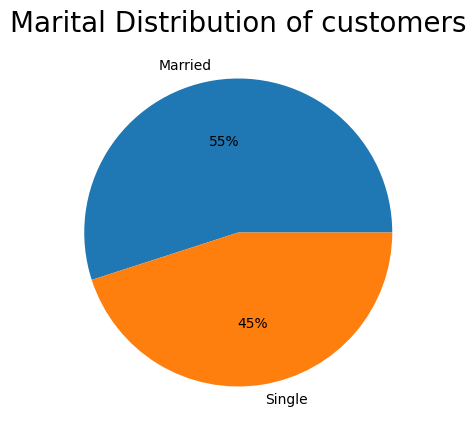

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(m, labels = ['Married','Single'], autopct='%0.0f%%')
plt.title("Marital Distribution of customers",fontsize = 20)
plt.show()

#Relationship between total children and number of customers

Text(0.5, 1.0, 'Count of customers vs Total Children')

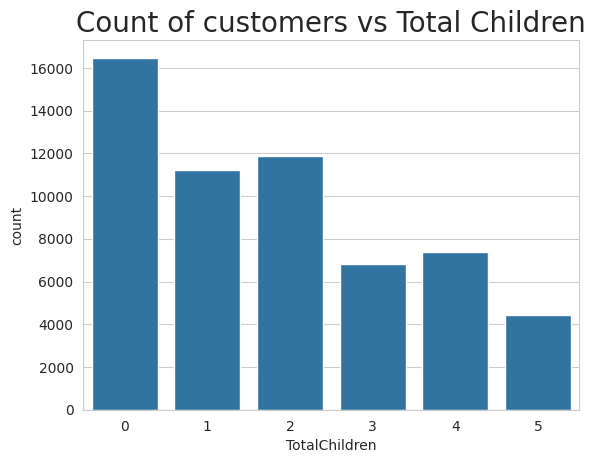

In [ ]:
sns.set_style('whitegrid')
tcd = sns.countplot(x='TotalChildren',data= Clean_Data)
plt.title('Count of customers vs Total Children',fontsize=20)

#Relationship between Education of customers and number of customers

<Axes: title={'center': 'Count of customers vs Education'}, xlabel='Education', ylabel='count'>

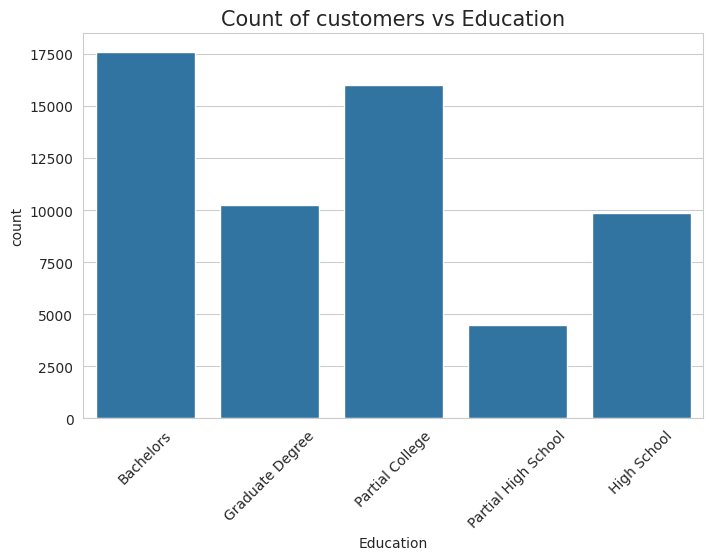

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
plt.xticks(rotation=45)
plt.title('Count of customers vs Education', fontsize=15)
sns.countplot(x='Education',data =Clean_Data)

#Relationship between Occupation of customers and number of customers

<Axes: title={'center': 'Count of customers vs Occupation'}, xlabel='Occupation', ylabel='count'>

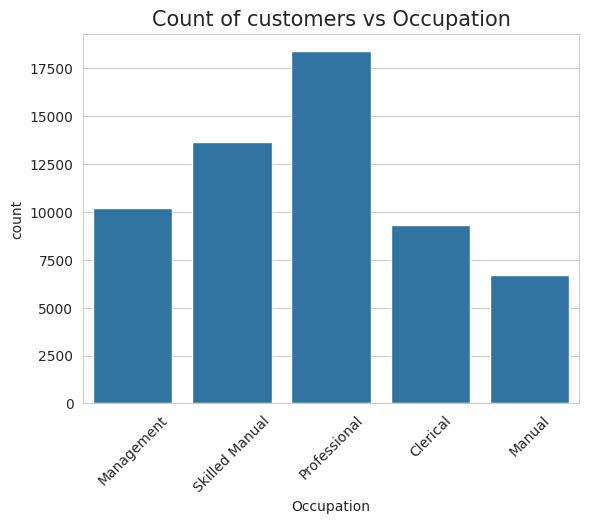

In [ ]:
sns.set_style('whitegrid')
plt.xticks(rotation=45)
plt.title('Count of customers vs Occupation', fontsize=15)
sns.countplot(x='Occupation',data =Clean_Data)

#Relationship between Commute Distance of customers and number of customers

<Axes: title={'center': 'Count of customers vs Commute Distance'}, xlabel='CommuteDistance', ylabel='count'>

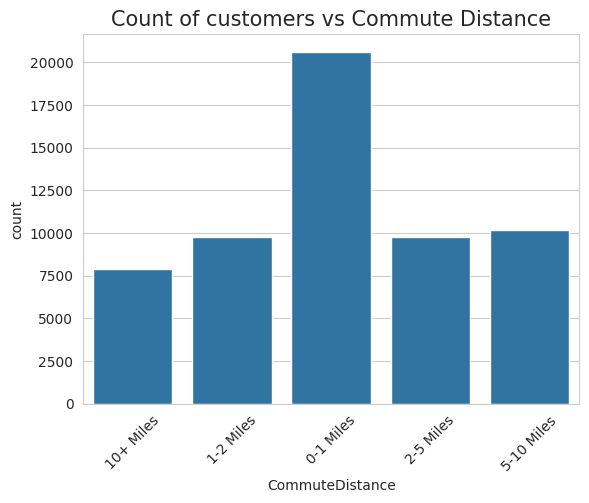

In [ ]:
sns.set_style('whitegrid')
plt.xticks(rotation=45)
plt.title('Count of customers vs Commute Distance', fontsize=15)
sns.countplot(x='CommuteDistance',data =Clean_Data)

#Category Distribution of Customers

In [ ]:
c=Clean_Data.groupby('Category')['CustomerKey'].count()
c

Category
Accessories    34319
Bikes          15205
Clothing        8665
Name: CustomerKey, dtype: int64

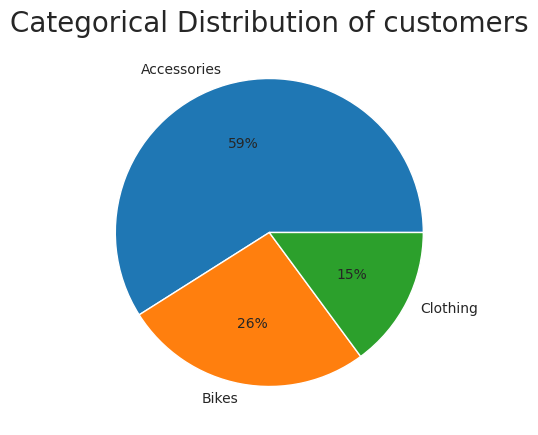

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(c, labels = ['Accessories','Bikes','Clothing'], autopct='%0.0f%%')
plt.title("Categorical Distribution of customers",fontsize = 20)
plt.show()

#Relationship between Sub category of Products and number of customers

<Axes: title={'center': 'Count Of customers VS Sub category'}, xlabel='SubCategory', ylabel='count'>

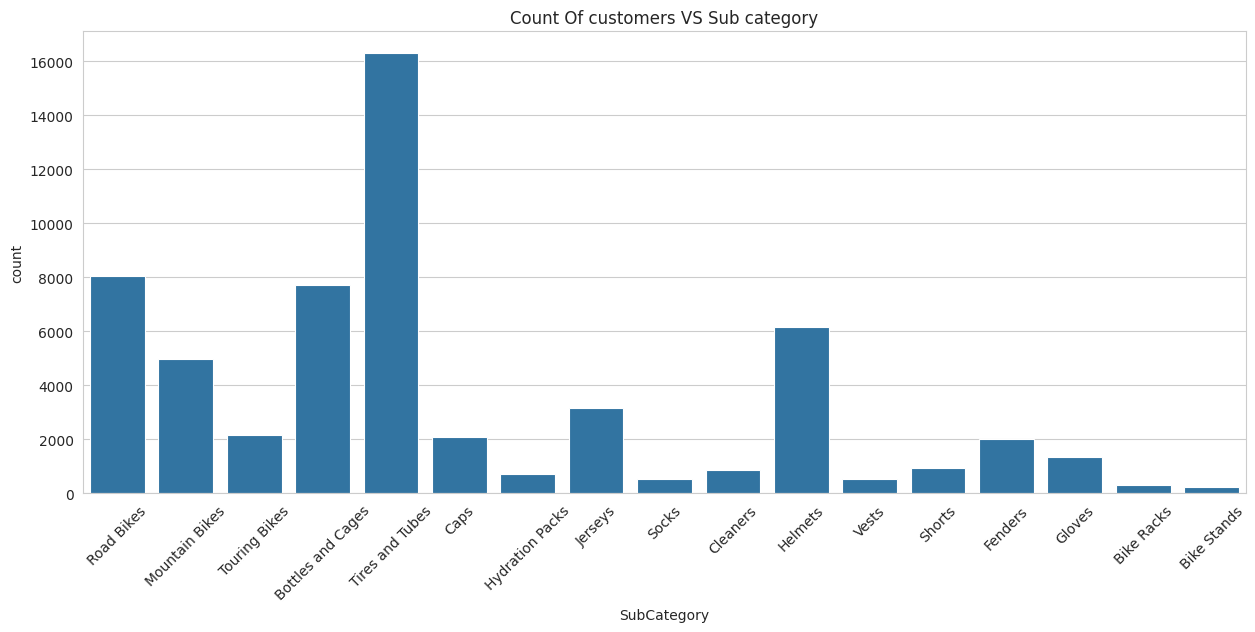

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
plt.xticks(rotation = 45)
plt.title('Count Of customers VS Sub category')
sns.set_context("paper",font_scale=2)
sns.set_style('whitegrid')
sns.countplot(x='SubCategory',data = Clean_Data)

#Relationship between Country and number of Customers

<Axes: title={'center': 'Count Of customers VS Country'}, xlabel='Country', ylabel='count'>

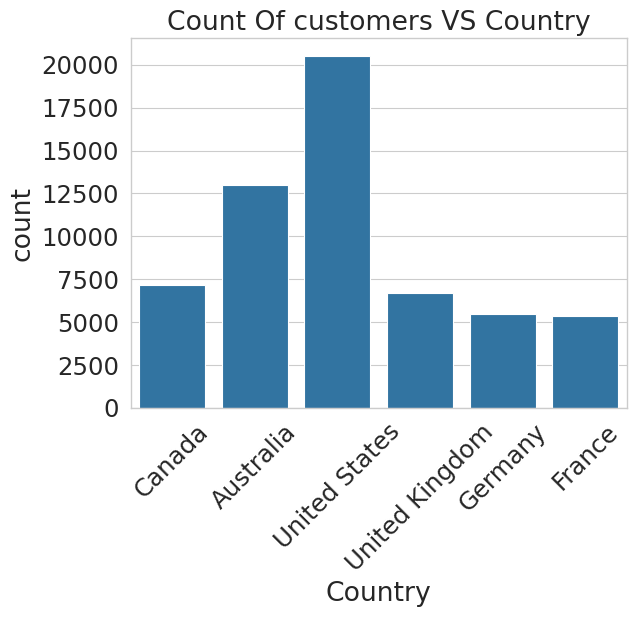

In [ ]:
plt.xticks(rotation = 45)
plt.title('Count Of customers VS Country')
sns.set_context("paper",font_scale=1.2)
sns.set_style('whitegrid')
sns.countplot(x='Country',data = Clean_Data)

#Gender Distribution of Sales

<Axes: title={'center': 'Gender distribution of sales'}, ylabel='SalesAmount'>

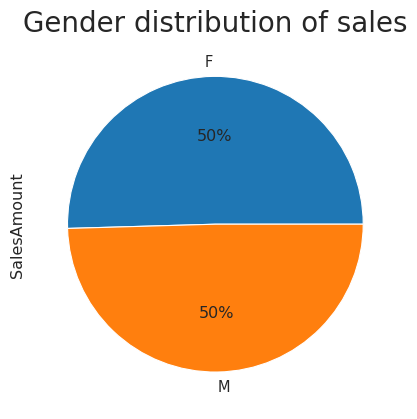

In [ ]:
salesGender = Clean_Data.groupby('Gender').SalesAmount.sum()
plt.title('Gender distribution of sales',fontsize = 20)
salesGender.plot(kind='pie',autopct='%0.0f%%')

#Marital Distribution of Sales

<Axes: title={'center': 'Marital Status distribution of sales'}, ylabel='SalesAmount'>

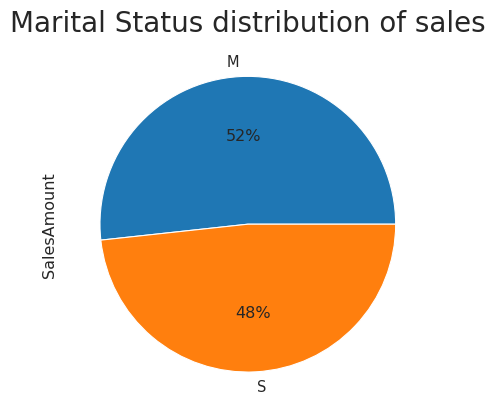

In [ ]:
salesGender = Clean_Data.groupby('MaritalStatus').SalesAmount.sum()
plt.title('Marital Status distribution of sales',fontsize = 20)
salesGender.plot(kind='pie',autopct='%0.0f%%')

#Relationship between Yearly income and sales

<Axes: title={'center': 'Sales VS Yearly Income'}, xlabel='YearlyIncome', ylabel='Sales Amount'>

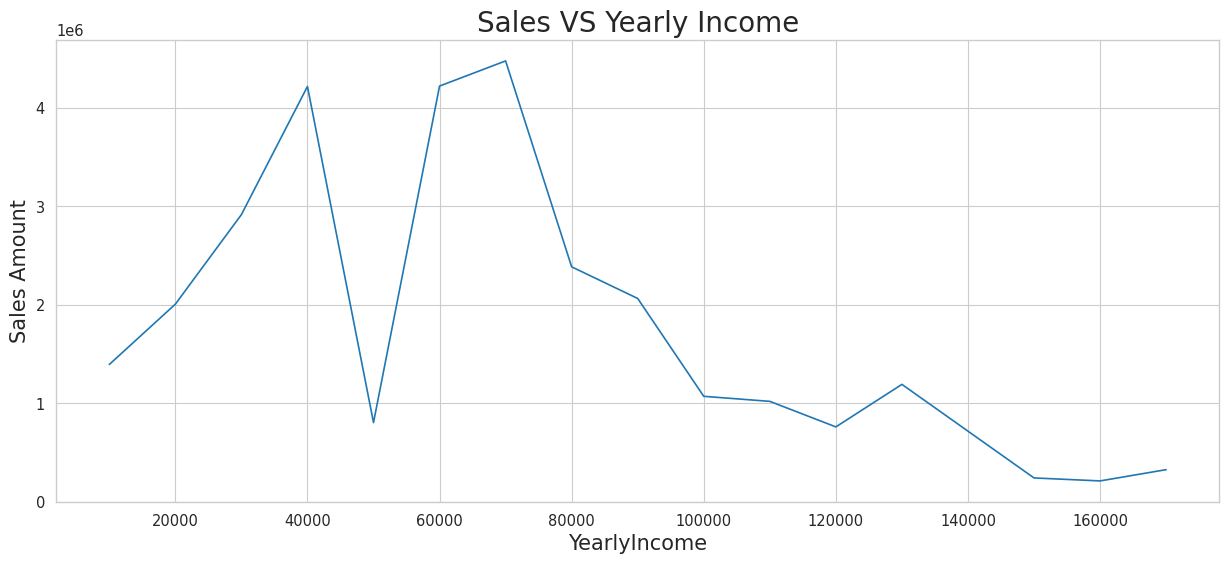

In [ ]:
salesYearlyIncome = Clean_Data.groupby('YearlyIncome').SalesAmount.sum()
plt.figure(figsize=(15,6))
plt.xlabel("Yearly Income", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS Yearly Income',fontsize = 20)
plt.grid()
salesYearlyIncome.plot(kind='line')

#Relationship between Total Chidren and Sales

<Axes: title={'center': 'Sales VS Total Children'}, xlabel='TotalChildren', ylabel='Sales Amount'>

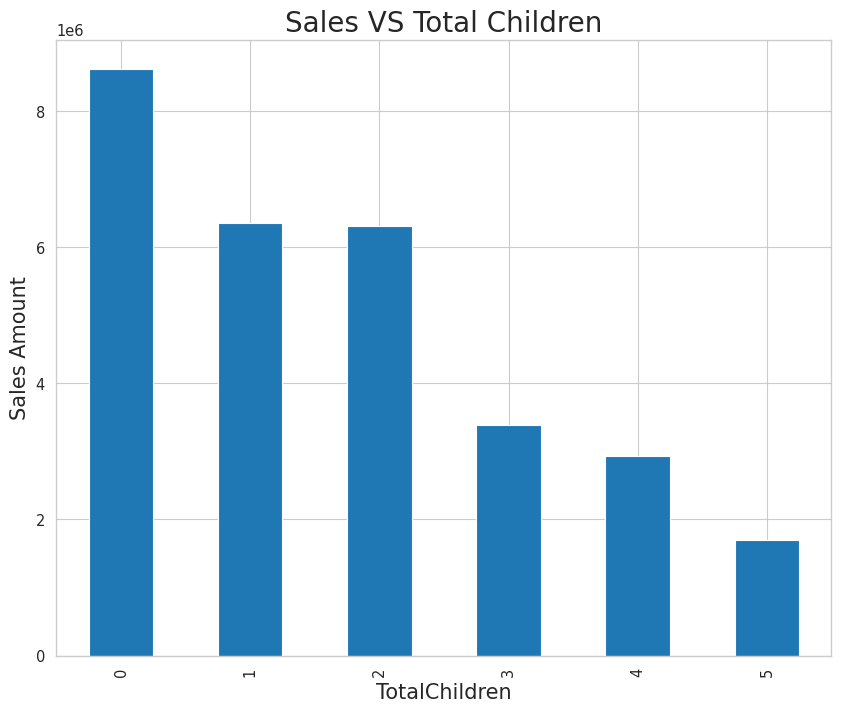

In [ ]:
salesTotalChildren = Clean_Data.groupby('TotalChildren').SalesAmount.sum()
plt.figure(figsize=(10,8))
plt.xlabel("Total Children", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS Total Children',fontsize = 20)
plt.grid()
salesTotalChildren.plot(kind='bar')

#Relationship between education and Sales

---



<Axes: title={'center': 'Sales VS Education'}, xlabel='Education', ylabel='Sales Amount'>

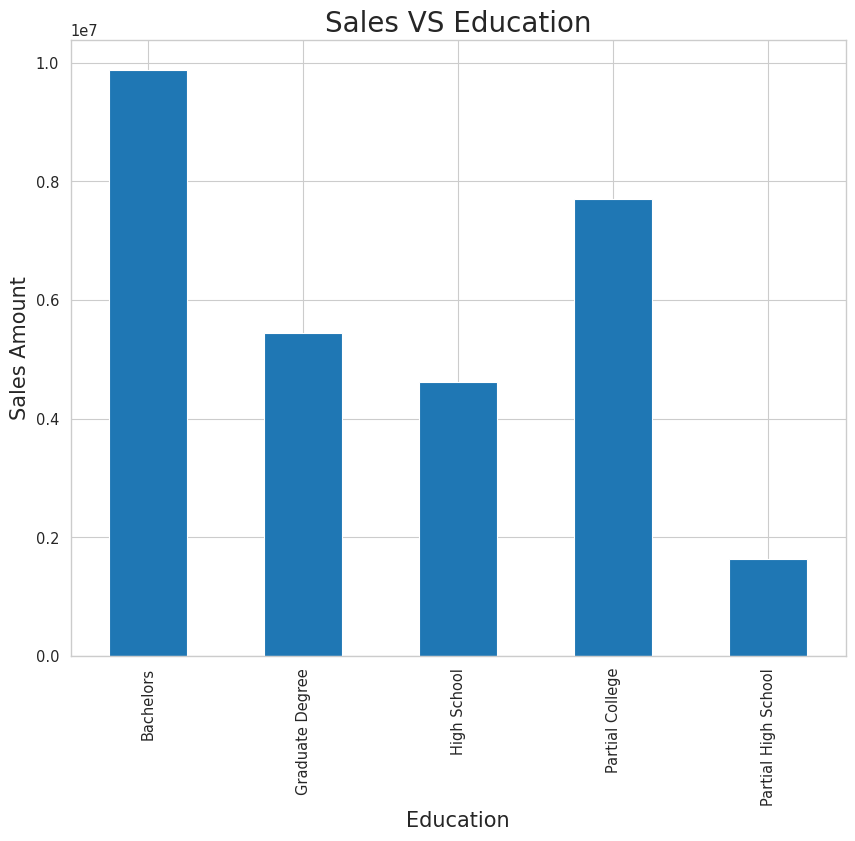

In [ ]:
salesEducation = Clean_Data.groupby('Education').SalesAmount.sum()
plt.figure(figsize=(10,8))
plt.xlabel("Education", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS Education',fontsize = 20)
plt.grid()
salesEducation.plot(kind='bar')

#Relationship between Occupation and Sales

<Axes: title={'center': 'Sales VS Occupation'}, xlabel='Occupation', ylabel='Sales Amount'>

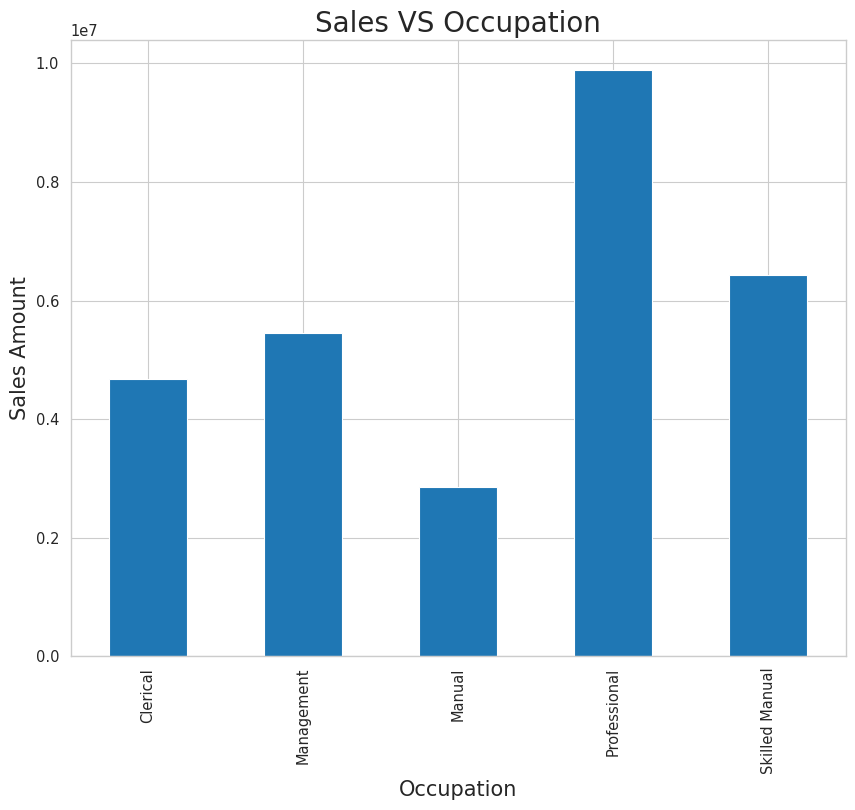

In [ ]:
salesOccupation = Clean_Data.groupby('Occupation').SalesAmount.sum()
plt.figure(figsize=(10,8))
plt.xlabel("Occupation", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS Occupation',fontsize = 20)
plt.grid()
salesOccupation.plot(kind='bar')

#Relationship between Sales and Commute Distance

<Axes: title={'center': 'Sales VS CommuteDistance'}, xlabel='CommuteDistance', ylabel='Sales Amount'>

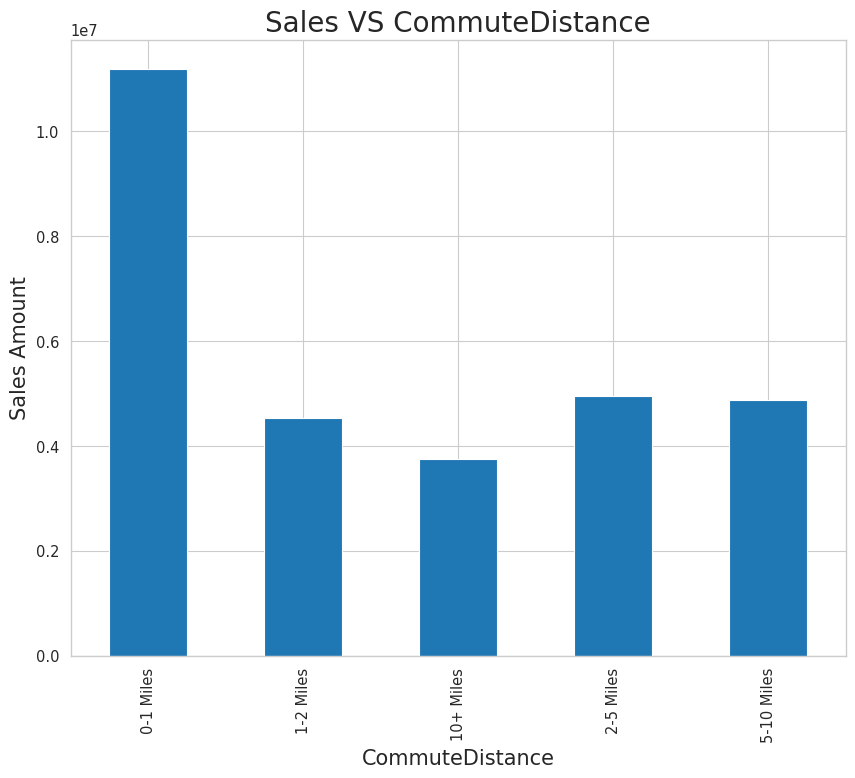

In [ ]:
salesCommuteDistance = Clean_Data.groupby('CommuteDistance').SalesAmount.sum()
plt.figure(figsize=(10,8))
plt.xlabel("Commute Distance", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS CommuteDistance',fontsize = 20)
plt.grid()
salesCommuteDistance.plot(kind='bar')

#Category Distribution of Sales

<Axes: title={'center': 'Sales Category Distribution'}, ylabel='SalesAmount'>

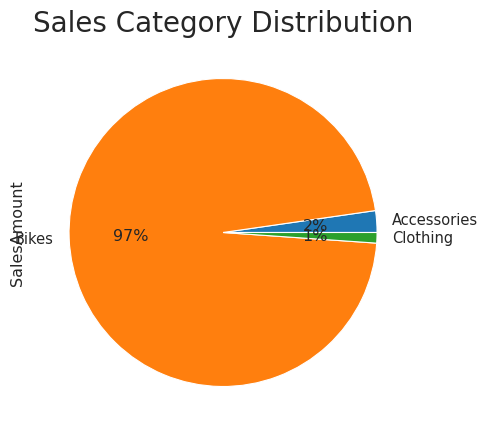

In [ ]:
salesCategory = Clean_Data.groupby('Category').SalesAmount.sum()
plt.figure(figsize=(5,5))
plt.title('Sales Category Distribution',fontsize = 20)
salesCategory.plot(kind='pie',autopct='%0.0f%%')

#Relationship between Sub Category and Sales

<Axes: title={'center': 'Sales VS SubCategory'}, xlabel='SubCategory', ylabel='Sales Amount'>

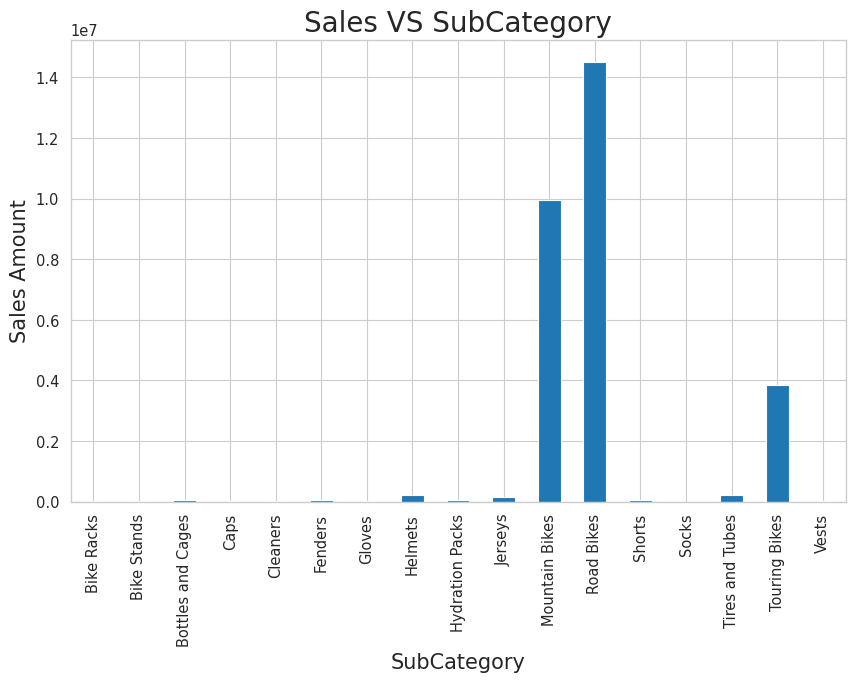

In [ ]:
salesSubCategory = Clean_Data.groupby('SubCategory').SalesAmount.sum()
plt.figure(figsize=(10,6))
plt.xlabel("SubCategory", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS SubCategory',fontsize = 20)
plt.grid()
salesSubCategory.plot(kind='bar')

#Country Distribution of Sales

<Axes: title={'center': 'Sales Country Distribution'}, ylabel='SalesAmount'>

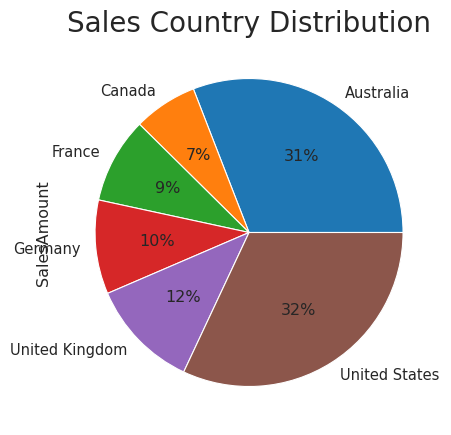

In [ ]:
salesCategory = Clean_Data.groupby('Country').SalesAmount.sum()
plt.figure(figsize=(5,5))
plt.title('Sales Country Distribution',fontsize = 20)
salesCategory.plot(kind='pie',autopct='%0.0f%%')

#Relationship between Birth Date and Sales

<Axes: title={'center': 'Sales VS Birth Date'}, xlabel='BirthDate', ylabel='Sales Amount'>

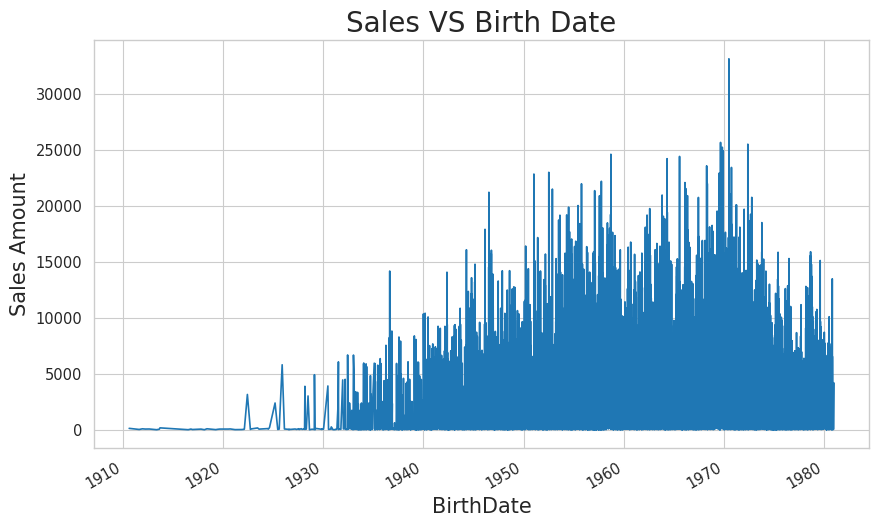

In [ ]:
salesBirthDate = Clean_Data.groupby('BirthDate').SalesAmount.sum()
plt.figure(figsize=(10,6))
plt.xlabel("BirthDate", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales VS Birth Date',fontsize = 20)
plt.grid()
salesBirthDate.plot(kind='line')